In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Make data frame

In [160]:
# Read in the CSV file with two sheets
df = pd.read_csv('train.csv')  


In [161]:
average_age_by_pclass = df.groupby('Pclass')['Age'].mean()
average_age_by_pclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [162]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return average_age_by_pclass[row['Pclass']]
    return row['Age']

# Apply the function to fill blank cells in the Age column
df['Age'] = df.apply(fill_age, axis=1)

In [163]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C


In [164]:
selected_features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = df[selected_features]
y = df["Survived"]

In [165]:
# Preprocess categorical features
label_encoders = {}
for feature in ["Sex", "Embarked"]:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
    label_encoders[feature] = le


C:\Users\MMEC82~1.NEZ\AppData\Local\Temp/ipykernel_21496/1249772831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = le.fit_transform(X[feature])


# XGBoost

In [166]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Create and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=1000)
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, 
             eval_set=[(X_test, y_test)], verbose=False)

c:\Users\M.M.Nezhad\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [167]:
# Make predictions
y_pred = xgb_model.predict(X_test)

In [168]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8432835820895522


## Checking parameters

### n_estimators

In [34]:
# Initialize lists to store accuracy and n_estimators values
accuracies = []
n_estimators_list = range(10, 500)

# Loop over different n_estimators
for n_estimators in n_estimators_list:
    # Create XGBoost model
    model = XGBClassifier(n_estimators=n_estimators)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)



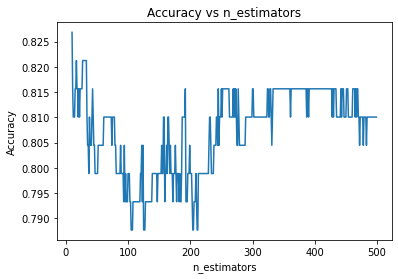

In [35]:
# Plot accuracy vs n_estimators
plt.plot(n_estimators_list, accuracies)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_estimators')
plt.show()

### Max_deapth

In [121]:
# Initialize lists to store accuracy and n_estimators values
accuracies = []
max_deapth_range = range(1, 50)

# Loop over different n_estimators
for max_deapth in max_deapth_range:
    # Create XGBoost model
    model = XGBClassifier(n_estimators=1000,max_depth=max_deapth)
    
    # Train the model
    model.fit(X_train, y_train, early_stopping_rounds=100, 
             eval_set=[(X_test, y_test)], verbose=False)
    


    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)



c:\Users\M.M.Nezhad\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\M.M.Nezhad\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\M.M.Nezhad\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\M.M.Nezhad\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWar

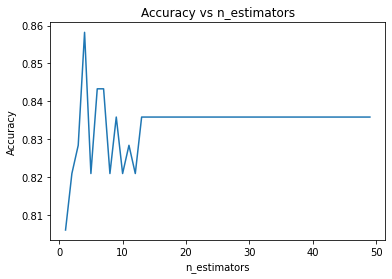

In [122]:
# Plot accuracy vs n_estimators
plt.plot(max_deapth_range, accuracies)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_estimators')
plt.show()

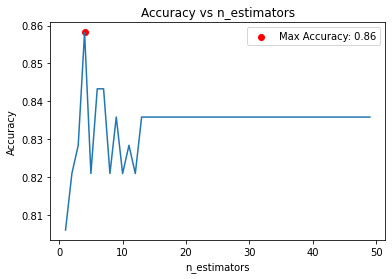

In [123]:
# Find the index where accuracy is maximum
max_accuracy_idx = accuracies.index(max(accuracies))
max_accuracy = accuracies[max_accuracy_idx]
optimal_n_estimators = max_deapth_range[max_accuracy_idx]

# Plot accuracy vs n_estimators
plt.plot(max_deapth_range, accuracies)
plt.scatter(optimal_n_estimators, max_accuracy, color='red', label=f'Max Accuracy: {max_accuracy:.2f}', marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_estimators')
plt.legend()
plt.show()


In [125]:
max_accuracy_idx = accuracies.index(max(accuracies))
max_accuracy_idx

3

As we have 8 features , we should use at least 8 deapth . considering this , max_deapth limitaion will not adhere to the model .  

## Predict

In [147]:
# Read in the CSV file with two sheets
df_predict = pd.read_csv('test.csv')  


In [148]:
df_predict.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [149]:
average_age_by_pclass_predict = df_predict.groupby('Pclass')['Age'].mean()
average_age_by_pclass_predict

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [150]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return average_age_by_pclass_predict[row['Pclass']]
    return row['Age']

# Apply the function to fill blank cells in the Age column
df_predict['Age'] = df_predict.apply(fill_age, axis=1)

In [151]:
df_predict

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.027945,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.027945,0,0,359309,8.0500,NaN,S


In [152]:
selected_features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X_predict = df_predict[selected_features]

In [153]:
# Preprocess categorical features
label_encoders = {}
for feature in ["Sex", "Embarked"]:
    le = LabelEncoder()
    X_predict[feature] = le.fit_transform(X_predict[feature])
    label_encoders[feature] = le


C:\Users\MMEC82~1.NEZ\AppData\Local\Temp/ipykernel_21496/2601840239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict[feature] = le.fit_transform(X_predict[feature])


In [154]:
X_predict

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.500000,0,0,7.8292,1
1,3,0,47.000000,1,0,7.0000,2
2,2,1,62.000000,0,0,9.6875,1
3,3,1,27.000000,0,0,8.6625,2
4,3,0,22.000000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,24.027945,0,0,8.0500,2
414,1,0,39.000000,0,0,108.9000,0
415,3,1,38.500000,0,0,7.2500,2
416,3,1,24.027945,0,0,8.0500,2


In [155]:
Y_predict = xgb_model.predict(X_predict)

In [156]:
Y_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [157]:
result_df = pd.DataFrame({
    'PassengerId': df_predict['PassengerId'],
    'Survived': Y_predict
})

In [158]:
result_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [159]:
result_df.to_csv('xgboost_predictions.csv', index=False)